## Contents
### 1. Importing libraries
### 2. Checking for Data Security and Privacy
### 3. Comparing customer behaviour in different geographic regions of US
### 4. Create an exclusion flag for low-activity customers
### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
### 6. The marketing and sales teams want to know which departments have the highest frequency of product orders.
### 7. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 8. Creating appropriate visualisations to answer sales team questions.

### Importing Libraries

In [132]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [42]:
# Turning project folder path into as string
path=r'/Users/jasmeetakaur/Downloads/Jasmeeta/Data Immersion Course/Achievement 1/Achievement 4/Instacart Basket Analysis'

In [43]:
# Importing the “ords_prods_customer_merge.pkl file
df=pd.read_pickle(os.path.join(path,'02 Data/Prepared Data/df_ords_prods_customer_merge.pkl'))

### 2. Checking for Data Security and Privacy

In [44]:
df.head(10)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest/Slowest days,busiest_period_of_day,max_order,Loyalty_flag,mean_prices,Spending_flag,order_frequency,Frequency_flag,True
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11,196,1,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10,196,2,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Slowest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21,38928,2,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11,38928,3,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,0,6184,1,0,both,Clementines,32,4,4.3,Low Range Product,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both


### There are only customer names in context of PII data but no phone numbers, addresses or emails included. We will drop the two columns with first and last names.

In [45]:
# Dropping "first_name" and "last_name" column.
df = df.drop(['first_name', 'last_name'], axis=1)

In [46]:
df.head(5)

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest/Slowest days,busiest_period_of_day,max_order,Loyalty_flag,mean_prices,Spending_flag,order_frequency,Frequency_flag,True
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11,196,1,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10,196,2,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Slowest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both


### Comparing customer behaviour in different geographic regions of US.

In [47]:
# Dividing states into regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [48]:
# Creating new columns based on division of states into regions
df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [49]:
# Finding the frequency of different regions
df['region'].value_counts(dropna='False')

region
South        3325041
West         2511231
Midwest      2312121
Northeast    1769860
Name: count, dtype: int64

In [50]:
# Checking the dataframe
df.head(5)

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest/Slowest days,busiest_period_of_day,max_order,Loyalty_flag,mean_prices,Spending_flag,order_frequency,Frequency_flag,True,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11,196,1,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10,196,2,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Slowest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest


In [51]:
# Creating a crosstab with region and spending flag
Spending_region = pd.crosstab(df['region'], df['Spending_flag'], dropna = False)

In [52]:
# Verifying the crosstab
Spending_region

Spending_flag,High Spender,Low Spender
region,,
Midwest,39264,2272857
Northeast,31365,1738495
South,64712,3260329
West,46577,2464654


In [53]:
# exporting the crosstab to clipboard
Spending_region.to_clipboard()

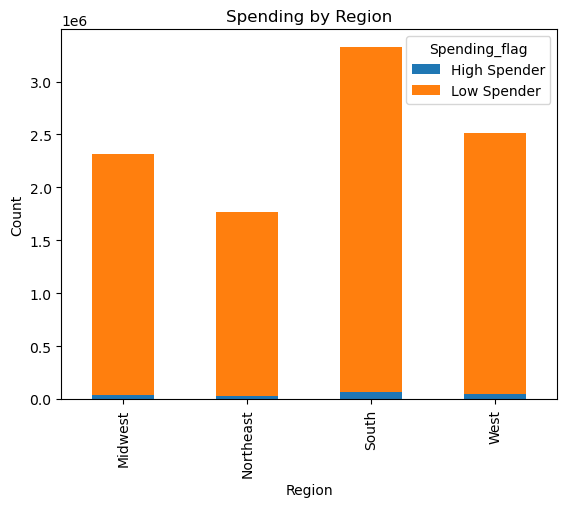

In [94]:
# Creating a bar graph
Spending_region.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Spending by Region')

# Show the plot
plt.show()

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers

In [54]:
df.loc[df['prices']< 5, 'Type_of_customer']='Low_activity'
df.loc[df['prices']>= 5, 'Type_of_customer']='High_activity'

In [55]:
# Finding frequency of types of customers
df['Type_of_customer'].value_counts(dropna='false')

Type_of_customer
High_activity    6885891
Low_activity     3030941
Name: count, dtype: int64

In [56]:
# Creating a separate data set for low activity customers
df_low_activity = df[df['Type_of_customer'] =='Low_activity']

In [57]:
# Creating a separate data set for high activity customers
df_high_activity = df[df['Type_of_customer'] =='High_activity']

In [59]:
# Checking the data set
df_high_activity

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest/Slowest days,busiest_period_of_day,max_order,Loyalty_flag,mean_prices,Spending_flag,order_frequency,Frequency_flag,True,region,Type_of_customer
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11,196,1,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10,196,2,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Slowest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918248,49635,Male,Hawaii,62,4/1/2020,3,married,168639,2187154,4,5,19,6,32744,1,1,both,Concentrated Bleach Fresh Meadow,75,17,6.7,Mid Range product,Regular busy day,Regular busy days,Average Orders,4,New customer,9.353333,Low Spender,6.0,Frequent Customer,both,West,High_activity
9918249,49635,Male,Hawaii,62,4/1/2020,3,married,168639,2187154,4,5,19,6,7123,3,0,both,Toilet Bowl Cleaner Clinging Bleach Gel,114,17,11.4,Mid Range product,Regular busy day,Regular busy days,Average Orders,4,New customer,9.353333,Low Spender,6.0,Frequent Customer,both,West,High_activity
9918250,49635,Male,Hawaii,62,4/1/2020,3,married,168639,2187154,4,5,19,6,35982,2,0,both,Tall Kitchen Drawstring Trash Bags with Reinfo...,60,17,8.4,Mid Range product,Regular busy day,Regular busy days,Average Orders,4,New customer,9.353333,Low Spender,6.0,Frequent Customer,both,West,High_activity
9918251,49635,Male,Hawaii,62,4/1/2020,3,married,168639,1513303,1,3,12,0,33682,4,0,both,Total 2% Greek Mixed Berries Yogurt,120,16,12.1,Mid Range product,Regular busy day,Slowest Days,Most Orders,4,New customer,9.353333,Low Spender,6.0,Frequent Customer,both,West,High_activity


In [60]:
## From now on only the high activity data set will be used.
# Checking the frequency of family status
df_high_activity['fam_status'].value_counts(dropna = False)

fam_status
married                             4847982
single                              1119306
divorced/widowed                     583147
living with parents and siblings     335456
Name: count, dtype: int64

### From here on we will use the data set with high activity customers since the Instacart CFO isn’t interested in  customers who don’t generate much revenue for the app.

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [61]:
# Finding the statistical description of the data set for age column
df_high_activity['age'].describe()

count    6.885891e+06
mean     4.943205e+01
std      1.847953e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [62]:
# Create a profiling variable based on Age
df_high_activity['Age_Group']= pd.cut(df_high_activity['age'], bins=[17,35,55,float('inf')],labels=['Young Adults','Middle Aged','Seniors'])

/var/folders/77/3dq_7lv50b1b4jqj7g8kp0880000gn/T/ipykernel_64200/3743896676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity['Age_Group']= pd.cut(df_high_activity['age'], bins=[17,35,55,float('inf')],labels=['Young Adults','Middle Aged','Seniors'])


In [63]:
# Checking the frequency of Age_Group
df_high_activity['Age_Group'].value_counts(dropna = False)

Age_Group
Seniors         2776125
Middle Aged     2159321
Young Adults    1950445
Name: count, dtype: int64

In [64]:
# Create a profiling variable based on Income
df_high_activity['Income_Category']= pd.cut(df_high_activity['income'], bins=[0,75000,150000,float('inf')], labels=['Low Income','Middle Income', 'High Income'])

/var/folders/77/3dq_7lv50b1b4jqj7g8kp0880000gn/T/ipykernel_64200/868541294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity['Income_Category']= pd.cut(df_high_activity['income'], bins=[0,75000,150000,float('inf')], labels=['Low Income','Middle Income', 'High Income'])


In [65]:
# Checking the frequency of Age_Group
df_high_activity['Income_Category'].value_counts(dropna = False)

Income_Category
Middle Income    3861057
Low Income       2141788
High Income       883046
Name: count, dtype: int64

In [66]:
# Create a profiling variable based on no of dependants
df_high_activity.loc[df_high_activity['n_dependants']==0, 'Dependants']='No Dependants'
df_high_activity.loc[df_high_activity['n_dependants']>0, 'Dependants']='Has Dependants'

/var/folders/77/3dq_7lv50b1b4jqj7g8kp0880000gn/T/ipykernel_64200/373179837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[df_high_activity['n_dependants']==0, 'Dependants']='No Dependants'


In [67]:
# Checking the frequency of Age_Group
df_high_activity['Dependants'].value_counts(dropna = False)

Dependants
Has Dependants    5183438
No Dependants     1702453
Name: count, dtype: int64

In [68]:
Finding the frequency of gender in the data set
df_high_activity['gender'].value_counts(dropna='False')

gender
Male      3458883
Female    3427008
Name: count, dtype: int64

In [69]:
# Create a timing profile based on day of week and hour of day
def timing_profile(order_day_of_week,order_hour_of_day):
     if order_day_of_week in [0,6] and order_hour_of_day >=20:
        return 'Weekend Late-Night Shoppers'
     else:
        return 'Other Shoppers'
        

In [70]:
# Apply the custom function to create timing_profile column
df_high_activity['timing_profile'] = df_high_activity.apply(lambda row: timing_profile(row['order_day_of_week'], row['order_hour_of_day']), axis=1)

/var/folders/77/3dq_7lv50b1b4jqj7g8kp0880000gn/T/ipykernel_64200/3434736683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity['timing_profile'] = df_high_activity.apply(lambda row: timing_profile(row['order_day_of_week'], row['order_hour_of_day']), axis=1)


In [71]:
# Checking the data set
df_high_activity.head(5)

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest/Slowest days,busiest_period_of_day,max_order,Loyalty_flag,mean_prices,Spending_flag,order_frequency,Frequency_flag,True,region,Type_of_customer,Age_Group,Income_Category,Dependants,timing_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity,Middle Aged,High Income,Has Dependants,Other Shoppers
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11,196,1,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity,Middle Aged,High Income,Has Dependants,Other Shoppers
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10,196,2,1,both,Soda,77,7,9.0,Mid Range product,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity,Middle Aged,High Income,Has Dependants,Other Shoppers
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity,Middle Aged,High Income,Has Dependants,Other Shoppers
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid Range product,Regular busy day,Slowest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High_activity,Middle Aged,High Income,Has Dependants,Other Shoppers


In [72]:
# Downloading "departments_wrangled" data set
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [73]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [74]:
# Renaming Unnamed: 0' to 'department_id'
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [75]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [76]:
# Merging the final data set with all the changes made with the departments file
df_final = df_high_activity.merge(df_dept, on = 'department_id')

Text(0, 0.5, 'Number of Orders')

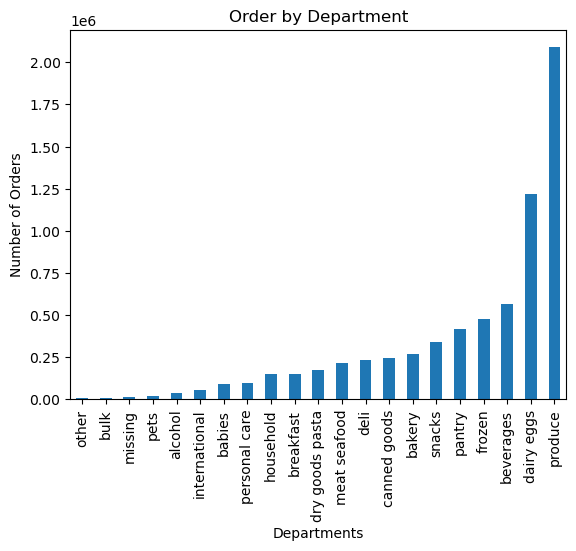

In [198]:
# Department bar chart

bar_dept = df_final['department'].value_counts().sort_values(ascending=True)
bar1 = bar_dept.plot.bar (title = 'Order by Department')
plt.xlabel("Departments", fontsize=10)  
plt.ylabel("Number of Orders", fontsize=10)

In [199]:
# save graph
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order by Department.png'))

### Question from marketing and sales team: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders. 
### We can see from the above graph maximum orders are received in the produce department.

### 7. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [78]:
# Data Analysis of Income profiles for expenditure
df_final.groupby('Income_Category').agg({'prices':['mean','min','max']})

prices           
                     mean  min   max
Income_Category                     
Low Income       9.722254  5.0  25.0
Middle Income    9.993566  5.0  25.0
High Income      9.993547  5.0  25.0

In [79]:
# Descriptive Analysis of Income profiles for usage frequency
df_final.groupby('Income_Category').agg({'max_order':['mean','min','max']})

max_order        
                      mean min max
Income_Category                   
Low Income       33.206850   3  99
Middle Income    32.870255   2  99
High Income      33.390445   3  99

In [80]:
# Descriptive Analysis of Age profiles for expenditure
df_final.groupby('Age_Group').agg({'prices':['mean','min','max']})

prices           
                  mean  min   max
Age_Group                        
Young Adults  9.900262  5.0  25.0
Middle Aged   9.907284  5.0  25.0
Seniors       9.916906  5.0  25.0

In [81]:
# Descriptive Analysis of Age profiles for usage frequency
df_final.groupby('Age_Group').agg({'max_order':['mean','min','max']})

max_order        
                   mean min max
Age_Group                      
Young Adults  33.639133   3  99
Middle Aged   32.870939   3  99
Seniors       32.754676   2  99

In [82]:
# Descriptive Analysis of Dependants profiles for expenditure
df_final.groupby('Dependants').agg({'prices':['mean','min','max']})

prices           
                    mean  min   max
Dependants                         
Has Dependants  9.911941  5.0  25.0
No Dependants   9.900750  5.0  25.0

In [83]:
# Descriptive Analysis of Dependants profiles for usage frequency
df_final.groupby('Dependants').agg({'max_order':['mean','min','max']})

max_order        
                     mean min max
Dependants                       
Has Dependants  33.039820   2  99
No Dependants   33.047257   3  99

In [84]:
# Descriptive Analysis of Timing profiles for expenditure
df_final.groupby('timing_profile').agg({'prices':['mean','min','max']})

prices           
                                 mean  min   max
timing_profile                                  
Other Shoppers               9.908791  5.0  25.0
Weekend Late-Night Shoppers  9.921962  5.0  25.0

In [85]:
# Descriptive Analysis of Timing profiles for usage frequency
df_final.groupby('timing_profile').agg({'max_order':['mean','min','max']})

max_order        
                                  mean min max
timing_profile                                
Other Shoppers               33.056048   2  99
Weekend Late-Night Shoppers  32.561921   3  99

In [97]:
# Creating a crosstab with region and spending flag
Spending_flag_region = pd.crosstab(df_final['region'], df_final['Spending_flag'], dropna = False)

In [200]:
# exporting the crosstab to clipboard
Spending_flag_region.to_clipboard()

In [204]:
Spending_flag_region

Spending_flag,High Spender,Low Spender
region,,
Midwest,28725,1578276
Northeast,22539,1203687
South,46360,2263058
West,34223,1709023


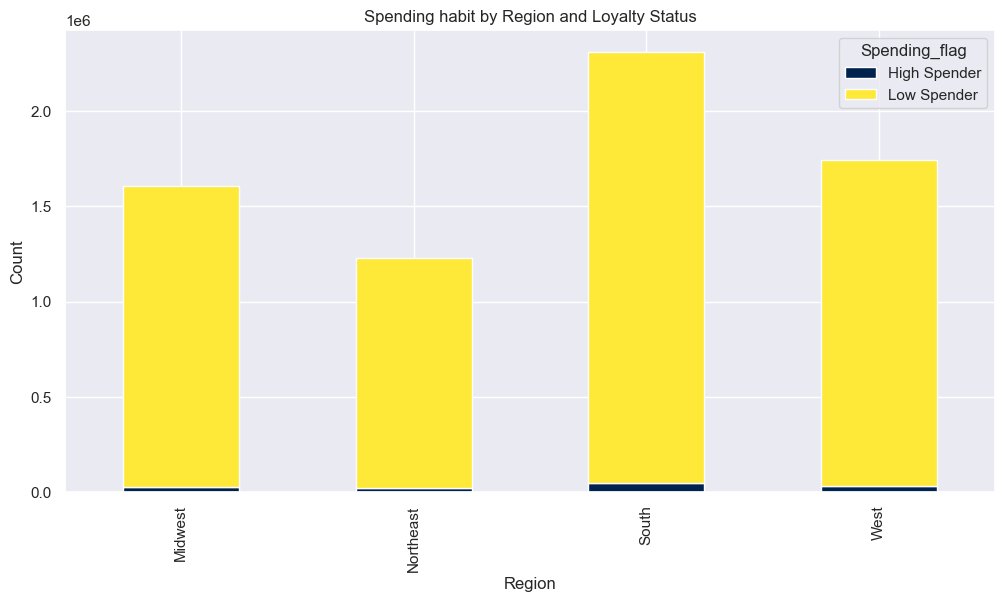

In [206]:
# Create a stacked bar chart
bar2 = Spending_flag_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='cividis')
# Title and labels
plt.title('Spending habit by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()

In [207]:
# Saving the bar graph
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habit by Region.png'))

In [168]:
# Creating a crosstab with fam_status and Dependants
family_profile = pd.crosstab(df_final['fam_status'], df_final['Loyalty_flag'], dropna = False)

In [169]:
# exporting the crosstab to clipboard
family_profile

Loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,186271,110005,286871
living with parents and siblings,110413,61469,163574
married,1534465,927974,2385543
single,356905,219820,542581


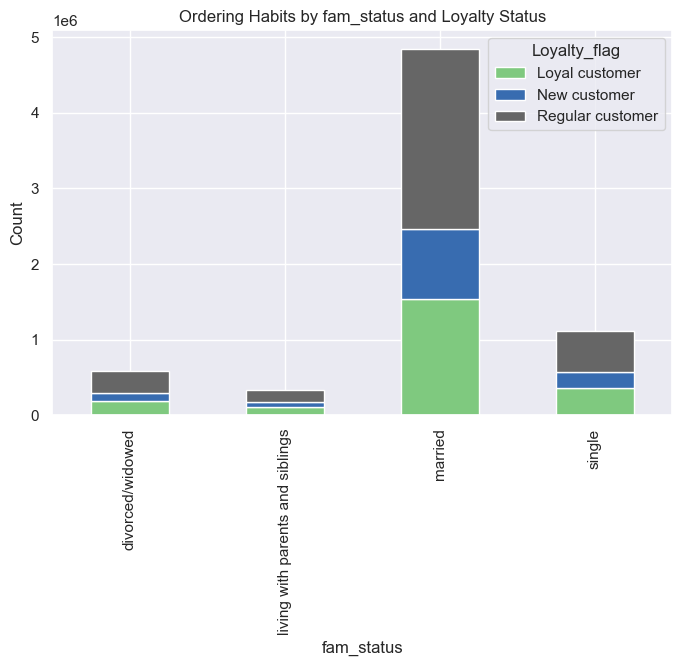

In [208]:
# Create a stacked bar chart
bar3 = family_profile.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Accent')
# Title and labels
plt.title('Ordering Habits by fam_status and Loyalty Status')
plt.xlabel('fam_status')
plt.ylabel('Count')

plt.show()

In [210]:
# Saving the bar graph
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ordering Habits by fam_status and Loyalty Status.png'))

Text(0, 0.5, 'Number of orders')

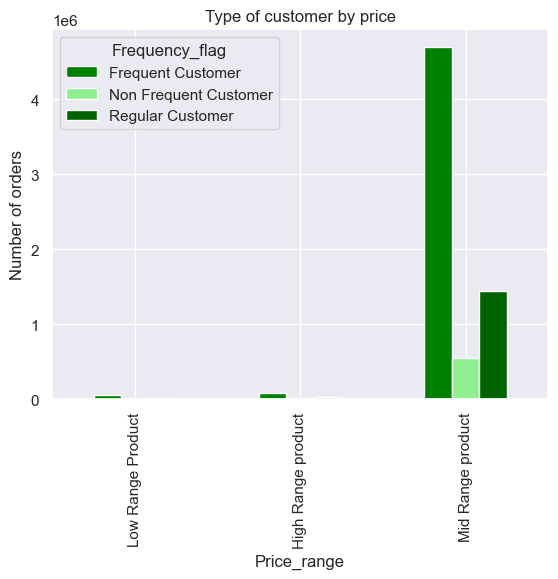

In [209]:
# Group departments and Frequency flag

price_frequent_cust = df_final.groupby(['price_range_loc', 'Frequency_flag']).size().unstack()
price_frequent_cust = price_frequent_cust.loc[price_frequent_cust.sum(axis=1).sort_values(ascending=True).index]

# Bar chart
bar_price_frequent_cust = price_frequent_cust.plot.bar(stacked = False, title = 'Type of customer by price', color = ['green', 'lightgreen', 'darkgreen'] )
plt.xlabel("Price_range")
plt.ylabel("Number of orders")

In [211]:
# Saving the bar graph
bar_price_frequent_cust.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ordering Habits by fam_status and Loyalty Status.png'))

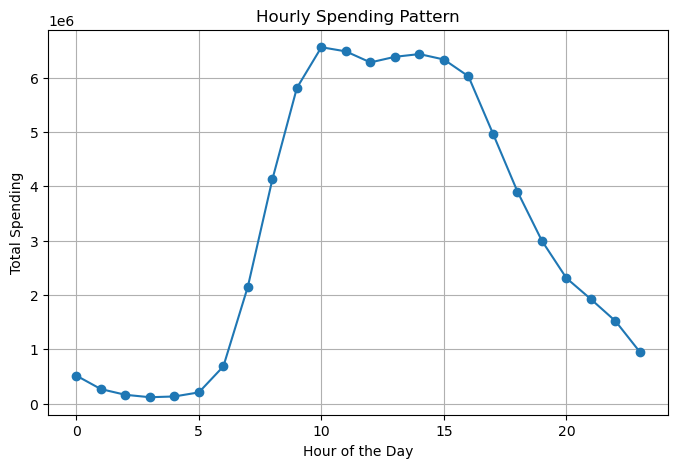

In [109]:
# Plotting a line graph for Hour of the day Vs Spending capacity
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)


### Question from Sales team: They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.
### We can see from the graph above that there is an increase in spending between around 10 a.m. and 3 pm.

### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.
### We have already created the price_range groupings into low_range, mid_range and high_range products.

Text(0.5, 1.0, 'Number of orders in different price range groupings')

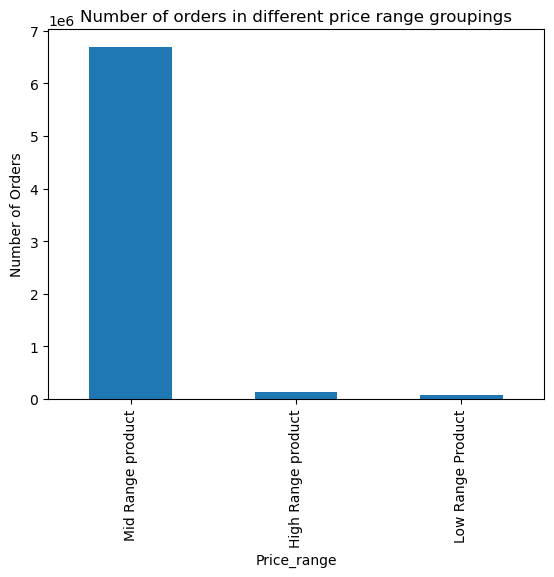

In [148]:
# Creating a Price range graph from 'price_range_loc' grouping
price_range_bar = df_final['price_range_loc'].value_counts().plot.bar(title = 'Distribution of Price Ranges')
plt.xlabel('Price_range')
plt.ylabel('Number of Orders')
plt.title('Number of orders in different price range groupings')


In [213]:
# Saving the bar graph
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Number of orders in different price range groupings.png'))

### What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
○ Are there differences in ordering habits based on a customer’s loyalty status?
○ Are there differences in ordering habits based on a customer’s region?
○ Is there a connection between age and family status in terms of ordering
habits?
○ What different classifications does the demographic information suggest?
Age? Income? Certain types of goods? Family status?
○ What differences can you find in ordering habits of different customer
profiles? Consider the price of orders, the frequency of orders, the products
customers are ordering, and anything else you can think of.

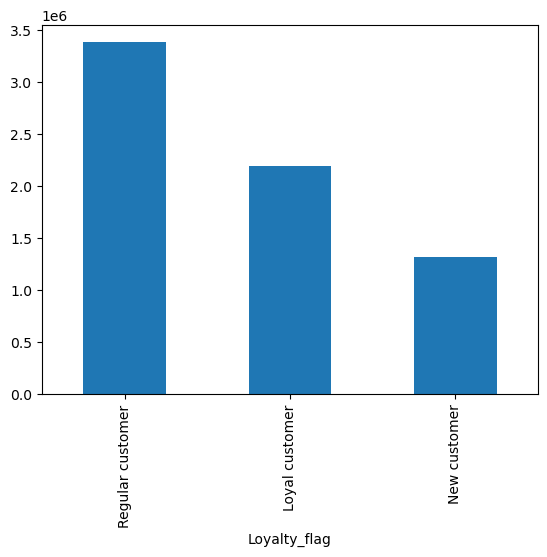

In [112]:
# 1. "Regular Customers" make up most of the instacart users 
loyalty_bar = df_final['Loyalty_flag'].value_counts().plot.bar()

In [214]:
# Saving the bar graph
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ordering Habits based on Loyalty Status.png'))

In [116]:
# Ordering habits based on customer's region
loyalty_flag_region = pd.crosstab(df_final['region'],df_final['Loyalty_flag'], dropna = False)

In [117]:
loyalty_flag_region

Loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,507134,308717,791150
Northeast,408951,228494,588781
South,729721,441803,1137894
West,542248,340254,860744


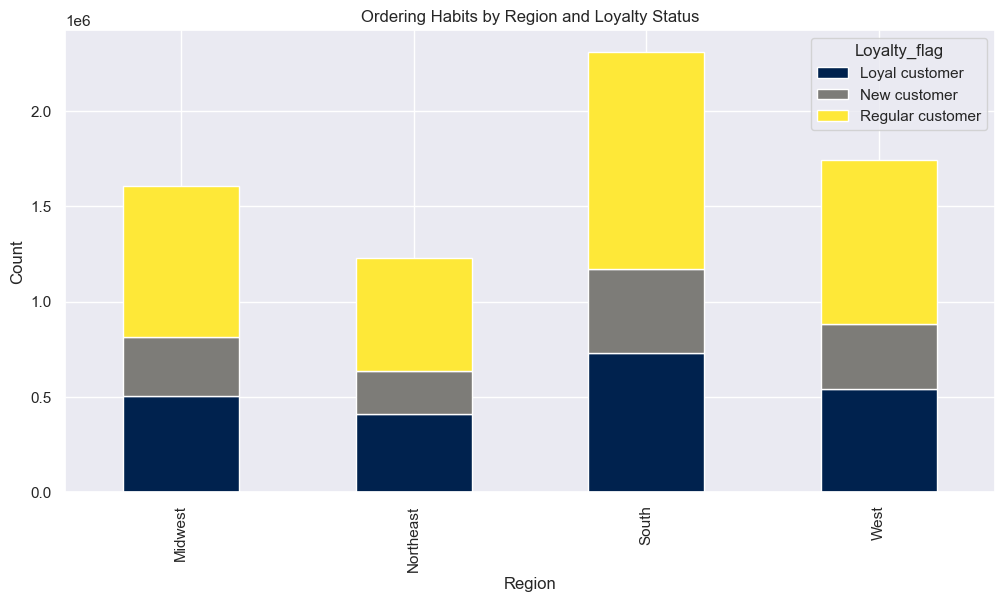

In [212]:
# Create a stacked bar chart
Ordering_habits_by_Loyalty_status = loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='cividis')
# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()

In [215]:
# Saving the bar graph
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ordering Habits by region and Loyalty Status.png'))

In [150]:
# Ordering habits based on customer's loyalty status
loyalty_flag_day = pd.crosstab(df_final['order_day_of_week'],df_final['Loyalty_flag'], dropna = False)

In [151]:
loyalty_flag_day

Loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,376878,273974,675966
1,388598,223904,584632
2,285103,170282,433530
3,268683,153711,391242
4,274141,146528,378439
5,308743,160236,424067
6,285908,190633,490693


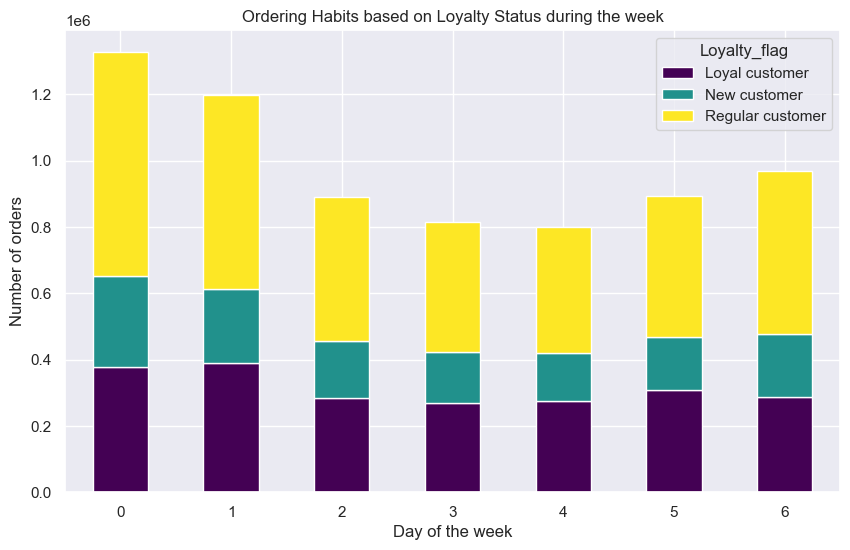

In [221]:
# Create a stacked bar chart
bar4 = loyalty_flag_day.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
# Title and labels
plt.title('Ordering Habits based on Loyalty Status during the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')

plt.show()

In [218]:
# Saving the bar graph
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ordering Habits based on Loyalty Status during the week.png'))

In [ ]:
# Department by income
income_dept = pd.crosstab(ords_prods_merge['department'], ords_prods_merge['income_status'], dropna=False)

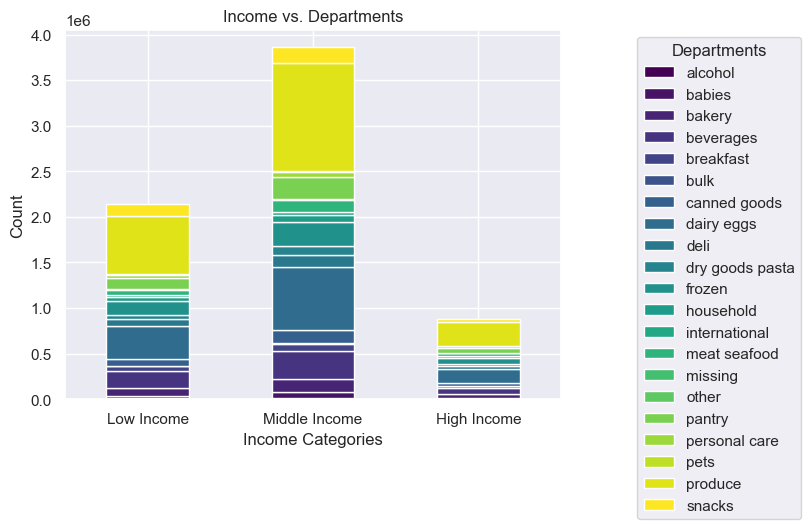

In [222]:
grouped_data = df_final.groupby(['Income_Category', 'department']).size().unstack(fill_value=0)

# Create a bar plot
bar5 = grouped_data.plot(kind='bar', stacked = 'True', colormap='viridis')

# Add labels and title
plt.xlabel('Income Categories')
plt.ylabel('Count')
plt.title('Income vs. Departments')

# Show the plot
plt.legend(title='Departments', title_fontsize='12', bbox_to_anchor=(1.50, 1.0), loc = 'upper right')
plt.xticks(rotation=0)
plt.show()

In [224]:
# Saving the bar graph
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending of Income among different Departments.png'))

In [161]:
# Creating a crosstab with fam_status and Dependants
age_loyalty = pd.crosstab(df_final['Age_Group'], df_final['Loyalty_flag'], dropna = False)

In [162]:
age_loyalty

Loyalty_flag,Loyal customer,New customer,Regular customer
Age_Group,,,
Young Adults,637311,368415,944719
Middle Aged,674524,413960,1070837
Seniors,876219,536893,1363013


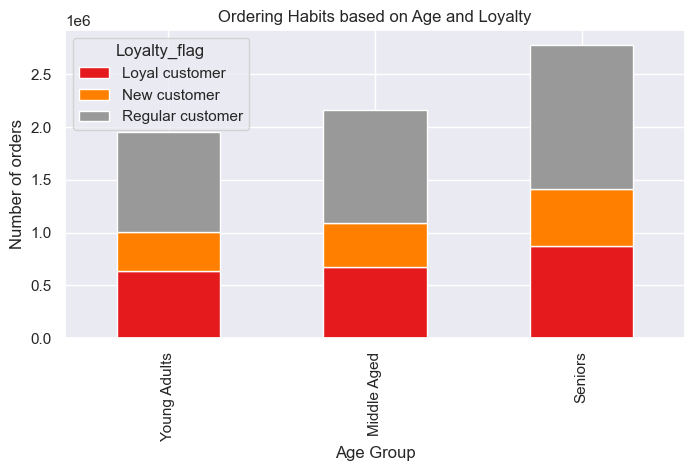

In [225]:
# Create a stacked bar chart
bar6 = age_loyalty.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set1')
# Title and labels
plt.title('Ordering Habits based on Age and Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Number of orders')

plt.show()

In [227]:
# Saving the bar graph
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Ordering habits on Age and Loyalty.png'))

In [1]:
df_final.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Final.csv'))

NameError: name 'df_final' is not defined